# Dataset:

Customer Responses to Insurance Policy Dataset
- **Description**: Contains customer demographic and behavioral data to predict whether they will respond positively to a Insurance policy.
- **Objective**: To build a machine learning model that predicts customer response to an insurance policy.
- **Applications**: Targeted marketing,Increasing Policy Conversion rate, response optimization.
- **Analysis Tasks**: EDA, data preprocessing, ML model building, evaluation.

## Importing Libraries

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings

## Loading Dataset

We load the customer data using pandas and take an initial look.

In [231]:
df = pd.read_csv(r'C:\Users\Om Computers\Downloads\Customer Responses to Insurance Policy\Data\data.csv')
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


**Exploratory Data Analysis (EDA)**

In this step, we explore the dataset to understand distributions, detect class imbalances, and inspect feature relationships.

- Check for null values.

- Analyze target variable distribution.

- Visualize categorical/numerical features to find trends.

## Checking for any Null values

In [234]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## Display Basic Info 

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [237]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [238]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [239]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

## Data Exploration (EDA)

### 1. Univariate Analysis (One Variable)
### Histogram for Numerical Data

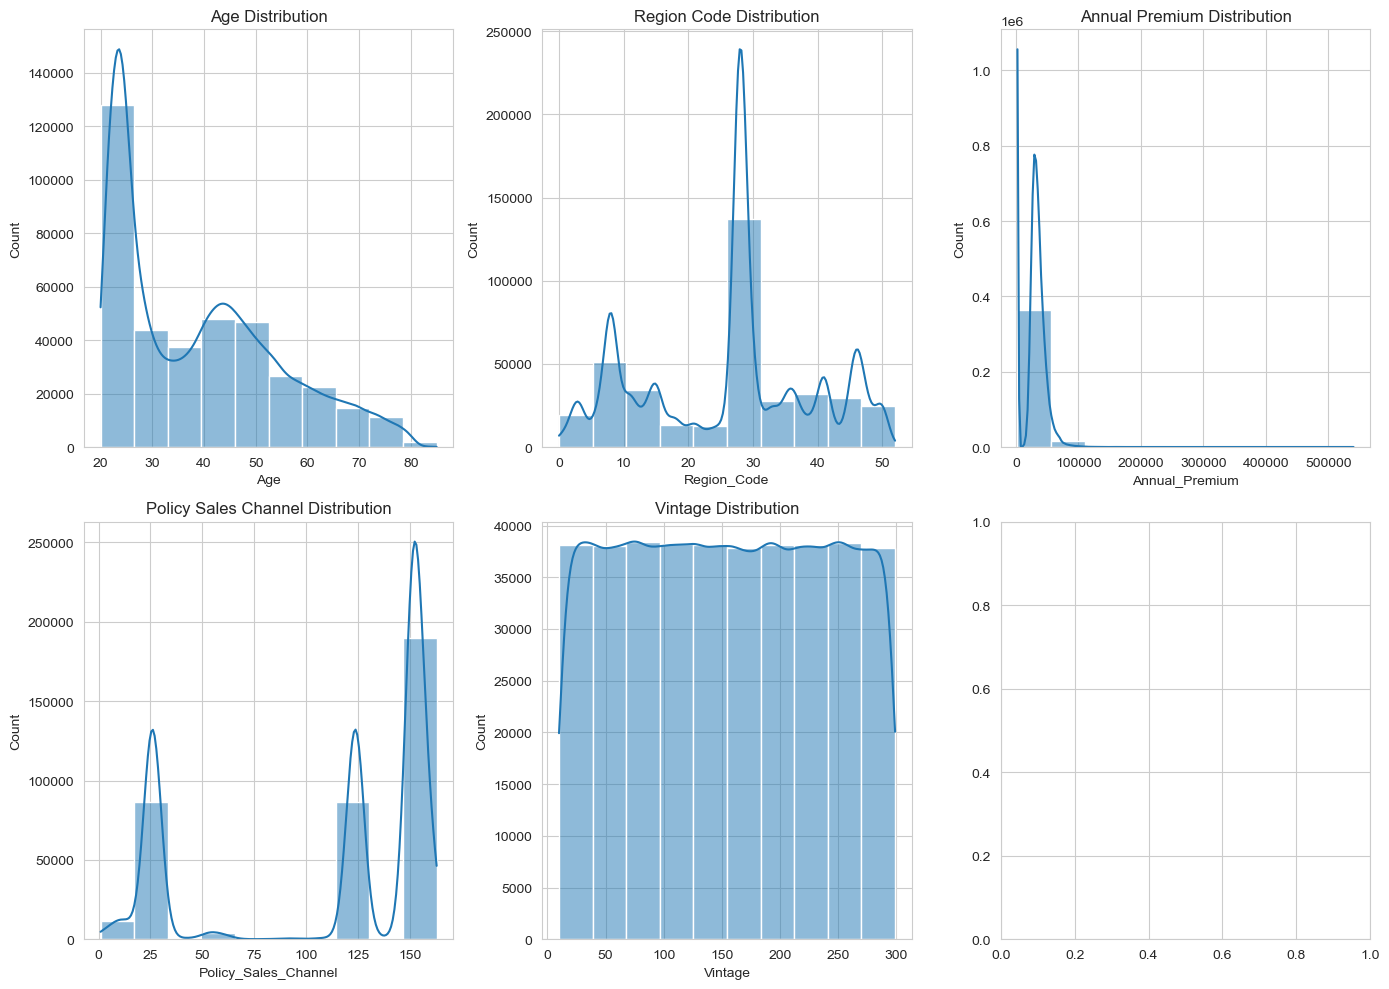

In [242]:
    # Set style for better visuals
    sns.set_style("whitegrid")
    
    # Create a figure with subplots
    fig, axes = plt.subplots(2, 3, figsize=(14, 10))
    
    # Plot 1: Age Distribution
    sns.histplot(df['Age'], bins=10, kde=True, ax=axes[0,0])
    axes[0,0].set_title("Age Distribution")
    
    # Plot 2: Region Code Distribution
    sns.histplot(df['Region_Code'], bins=10, kde=True, ax=axes[0,1])
    axes[0,1].set_title("Region Code Distribution")
    
    # Plot 3: Annual Premium Distribution
    sns.histplot(df['Annual_Premium'], bins=10, kde=True, ax=axes[0,2])
    axes[0,2].set_title("Annual Premium Distribution")
    
    # Plot 4: Policy Sales Channel Distribution
    sns.histplot(df['Policy_Sales_Channel'], bins=10, kde=True, ax=axes[1,0])
    axes[1,0].set_title("Policy Sales Channel Distribution")
    
    # Plot 5: Vintage Distribution
    sns.histplot(df['Vintage'], bins=10, kde=True, ax=axes[1,1])
    axes[1,1].set_title("Vintage Distribution")
    
    
    plt.tight_layout()
    plt.show()

### Count Plot for Categorical Data

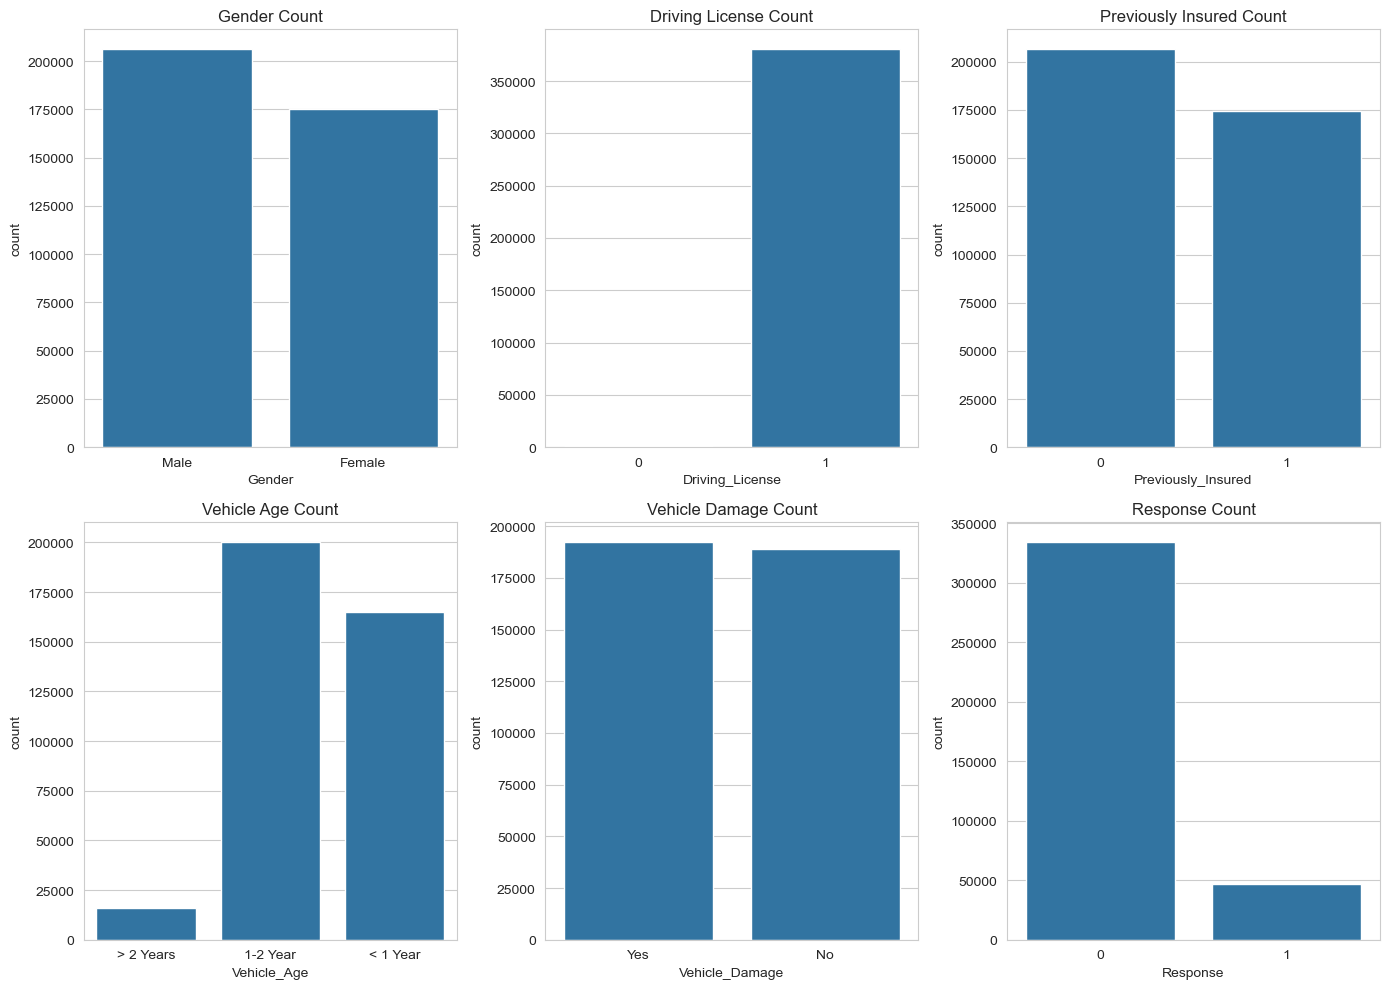

In [244]:
# Set style for better visuals
sns.set_style("whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(14, 10))

# Plot 1: Gender Count 
sns.countplot(x=df['Gender'], ax=axes[0,0])
axes[0,0].set_title("Gender Count")

# Plot 2: Driving License Count 
sns.countplot(x=df['Driving_License'], ax=axes[0,1])
axes[0,1].set_title("Driving License Count")

# Plot 3: Previously Insured Count 
sns.countplot(x=df['Previously_Insured'], ax=axes[0,2])
axes[0,2].set_title("Previously Insured Count")

# Plot 4: Vehicle Age Count 
sns.countplot(x=df['Vehicle_Age'], ax=axes[1,0])
axes[1,0].set_title("Vehicle Age Count")

# Plot 5: Vehicle Damage Count 
sns.countplot(x=df['Vehicle_Damage'], ax=axes[1,1])
axes[1,1].set_title("Vehicle Damage Count")

# Plot 6: Response Count 
sns.countplot(x=df['Response'], ax=axes[1,2])
axes[1,2].set_title("Response Count")

plt.tight_layout()
plt.show()

### 2. Bivariate Analysis (Two Variables)
### Histogram And Countplot

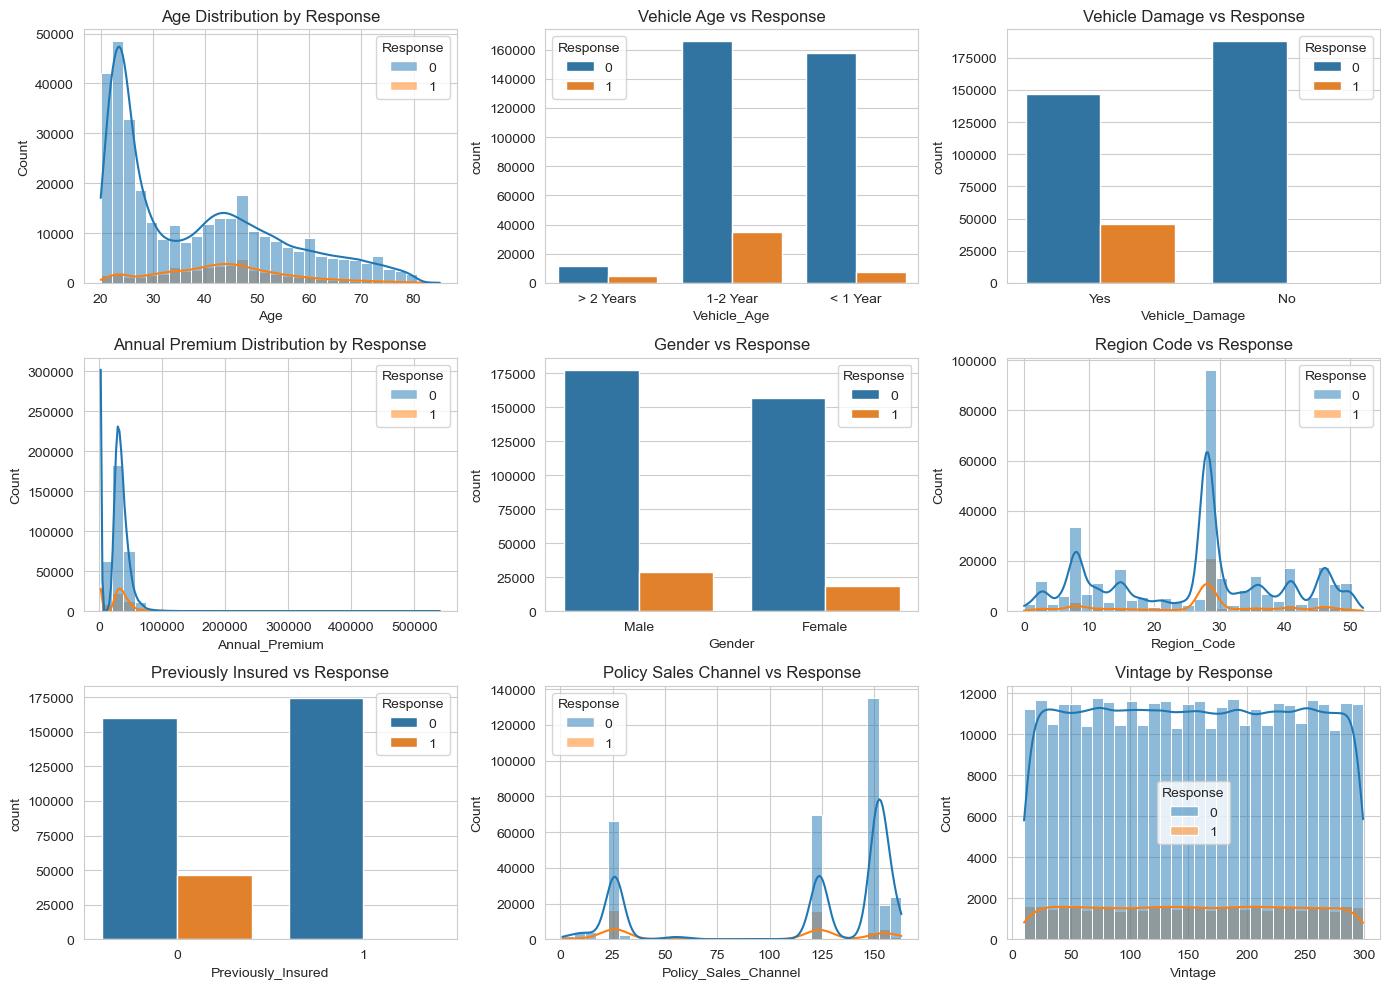

In [246]:
# Set style for better visuals
sns.set_style("whitegrid")

# Figure setup
fig, axes = plt.subplots(3, 3, figsize=(14, 10))

# Age distribution by response
sns.histplot(df, x="Age", hue="Response", kde=True, bins=30, ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution by Response")

# Vehicle Age vs. Response
sns.countplot(data=df, x="Vehicle_Age", hue="Response", ax=axes[0, 1])
axes[0, 1].set_title("Vehicle Age vs Response")

# Vehicle Damage vs. Response
sns.countplot(data=df, x="Vehicle_Damage", hue="Response", ax=axes[0, 2])
axes[0, 2].set_title("Vehicle Damage vs Response")

# Annual Premium Distribution by Response 
sns.histplot(df, x="Annual_Premium", hue="Response", kde=True, bins=30, ax=axes[1, 0])
axes[1, 0].set_title("Annual Premium Distribution by Response")

# Gender vs. Response
sns.countplot(data=df, x="Gender", hue="Response", ax=axes[1,1])
axes[1,1].set_title("Gender vs Response")

# Region Code by Response
sns.histplot(df, x="Region_Code", hue="Response", kde=True, bins=30, ax=axes[1,2])
axes[1,2].set_title("Region Code vs Response")

# Previously Insured vs. Response
sns.countplot(data=df, x="Previously_Insured", hue="Response", ax=axes[2,0])
axes[2,0].set_title("Previously Insured vs Response")

# Policy Sales Channel by Response
sns.histplot(df, x="Policy_Sales_Channel", hue="Response", kde=True, bins=30, ax=axes[2,1])
axes[2,1].set_title("Policy Sales Channel vs Response")

# Vintage by response
sns.histplot(df, x="Vintage", hue="Response", kde=True, bins=30, ax=axes[2,2])
axes[2,2].set_title("Vintage by Response")

plt.tight_layout()
plt.show()

# key insights from the visualizations:
**Age Distribution** – Younger customers seem to have a higher response rate than older ones.

**Vehicle Age Impact** – Customers with older vehicles (>2 years) tend to respond more positively.

**Vehicle Damage Effect** – Customers whose vehicles have been damaged are more likely to respond positively.

**Annual Premium Influence** – The response rate varies slightly across premium amounts, but higher premiums don’t seem to strongly impact responses.

**Sales Channel Effectiveness** –  Some sales channels perform better than others

**Vintage (Tenure)** - Customers with shorter tenure are slightly more likely to respond, possibly due to recent engagement or offers.

## Data Preprocessing
- Encode categorical variables using Label Encoding.

- Standardize numerical features.

- Train-test split.

In [264]:
# Drop unnecessary columns
df_encoded = df_encoded.drop(columns=["id"])

### Categorical Encoding

In [262]:
# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}

In [266]:
# Encode categorical features
for col in ["Gender", "Vehicle_Age", "Vehicle_Damage"]:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

In [268]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Feature Engineering

In [271]:
# Create a new feature 'Driving_Experience'
df_encoded['Driving_Experience'] = df_encoded['Age'] * df_encoded['Driving_License']

### Splitting Dataset

In [274]:
# Splitting dataset
X = df_encoded.drop(columns=["Response"])
y = df_encoded["Response"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Feature Scaling

In [277]:
# Standardizing numerical features
scaler = StandardScaler()
numeric_cols = ["Age", "Region_Code", "Annual_Premium", "Policy_Sales_Channel", "Vintage"]
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [279]:
# Data is now preprocessed and ready for model training
X_train.shape, X_test.shape

((304887, 11), (76222, 11))

## Model Selection

## Model Training And Evaluation

We experiment with various Classification models:
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier

We evaluate models using the following metrics:

- Accuracy
- Precision
- Recall
- F1-Score
- ROC AUC Score

In [283]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, max_depth=5, random_state=42),
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_pred),
    }

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
results_df

C:\Users\Om Computers\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.877437,0.000000,0.000000,0.000000,0.500000
Decision Tree,0.824329,0.292410,0.305181,0.298659,0.601013
Random Forest,0.865013,0.363663,0.135196,0.197113,0.551076
Gradient Boosting,0.877411,0.250000,0.000107,0.000214,0.500031


In [284]:
# Adjusting model parameters to reduce memory usage
models_optimized = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, max_depth=5, random_state=42),
}

# Train and evaluate models with optimized parameters
results_optimized = {}
for name, model in models_optimized.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results_optimized[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=1),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_pred),
    }

# Convert results to DataFrame
results_df_optimized = pd.DataFrame(results_optimized).T
results_df_optimized

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.877437,1.000000,0.000000,0.000000,0.500000
Decision Tree,0.876912,0.291667,0.002997,0.005933,0.500990
Random Forest,0.877437,1.000000,0.000000,0.000000,0.500000
Gradient Boosting,0.877411,0.250000,0.000107,0.000214,0.500031


In [285]:
response_counts = df["Response"].value_counts(normalize=True)
response_counts

Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64

 - **Class Imbalance** : The issue likely stems from Class Imbalance in the dataset. The dataset had 87.7% negative responses and only 12.3% positive responses, leading to biased models.
 - **Solution** : To improve performance, applying SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset and retrain the models. Implementing class weighting in models like Logistic Regression, Decision Trees and Random Forest  to balance the impact of both classes.

In [287]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verify new class distribution
y_train_balanced.value_counts(normalize=True)

Response
0    0.5
1    0.5
Name: proportion, dtype: float64

In [288]:
# Update models to include class weights
models_weights = {
        "Logistic Regression": LogisticRegression(max_iter=500, class_weight="balanced", random_state=42),
        "Decision Tree": DecisionTreeClassifier(max_depth=10, class_weight="balanced", random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, class_weight="balanced", random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, max_depth=5, random_state=42),  # No class_weight in GBM
    }

# Train and evaluate models with class weighting
results_weights = {}
for name, model in models_weights.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results_weights[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=1),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_pred),
    }

# Convert results to DataFrame
results_df_weights = pd.DataFrame(results_weights).T
results_df_weights

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.640104,0.251087,0.976665,0.399475,0.784878
Decision Tree,0.701910,0.280622,0.915971,0.429622,0.793990
Random Forest,0.701661,0.281364,0.922822,0.431244,0.796795
Gradient Boosting,0.877411,0.250000,0.000107,0.000214,0.500031


In [289]:
# Adjusting models parameters with inluding class weights
models_weighted = {
        "Logistic Regression": LogisticRegression( max_iter=500, class_weight="balanced", random_state=42),
        "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=12, min_samples_split=5, class_weight="balanced", random_state=42),
        "Random Forest": RandomForestClassifier(max_depth=20, min_samples_split=15, n_estimators=50, class_weight="balanced", random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, max_depth=10, random_state=42),  # No class_weight in GBM
    }

# Train and evaluate models with class weighting
results_weighted = {}
for name, model in models_weighted.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results_weighted[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=1),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_pred),
    }

# Convert results to DataFrame
results_df_weighted = pd.DataFrame(results_weighted).T
results_df_weighted

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.640104,0.251087,0.976665,0.399475,0.784878
Decision Tree,0.744562,0.285315,0.720402,0.408746,0.734170
Random Forest,0.756094,0.309746,0.805930,0.447502,0.777531
Gradient Boosting,0.876847,0.432836,0.015521,0.029968,0.506340


## Visualization to understand Model Evaluation
- Model Performance Metrics 
- Confusion Matrix Analysis
- ROC-AUC Curve Comparison

<Figure size 1200x600 with 0 Axes>

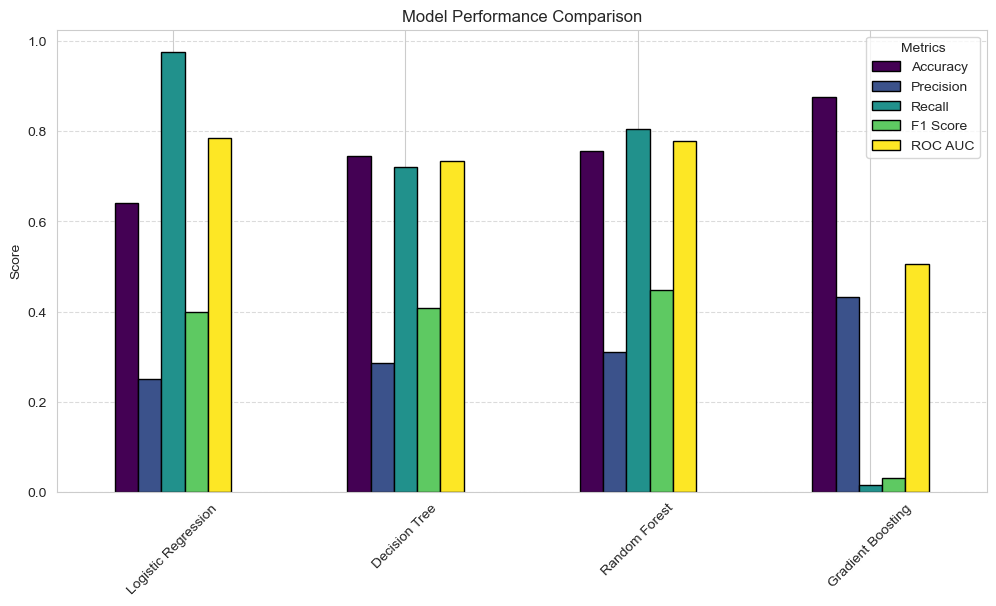

In [290]:
# Convert results to DataFrame for easy plotting
metrics_df = pd.DataFrame(results_weighted).T

# Plot bar charts for each metric
plt.figure(figsize=(12, 6))
metrics_df.plot(kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

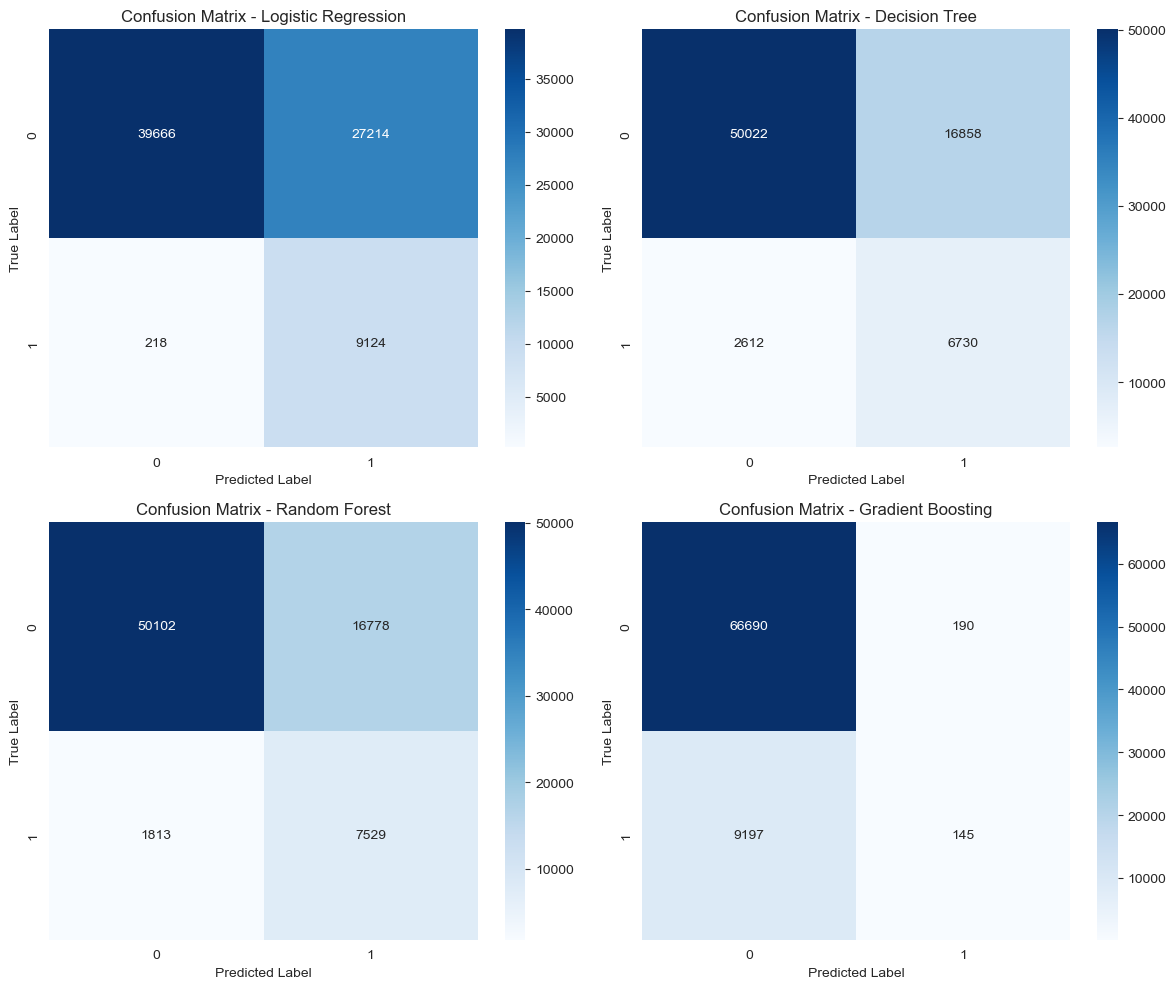

In [297]:
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid for 4 models
axes = axes.flatten()  # Flatten to loop through easily

for idx, (name, model) in enumerate(models_weighted.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix - {name}")
    axes[idx].set_xlabel("Predicted Label")
    axes[idx].set_ylabel("True Label")

plt.tight_layout()
plt.show()

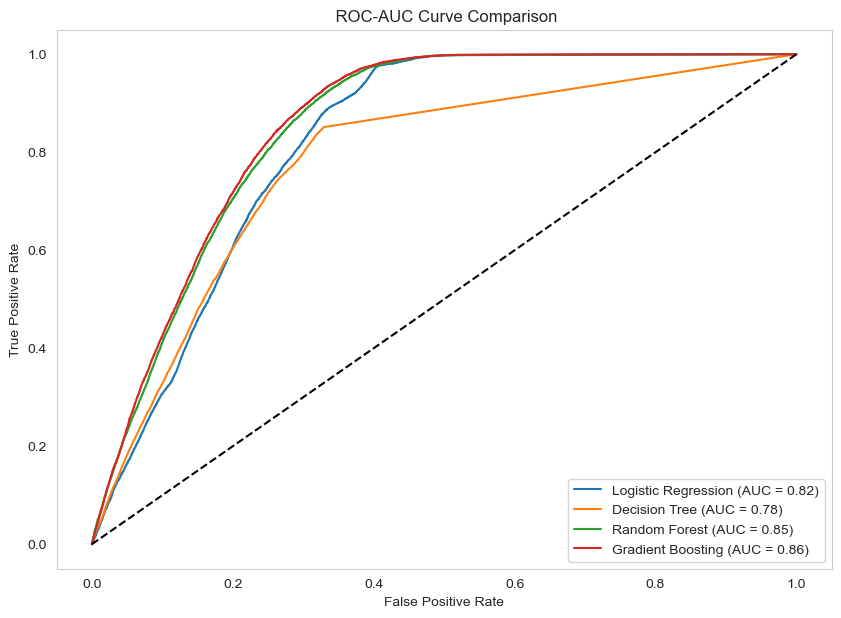

In [309]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(10, 7))

for name, model in models_weighted.items():
    y_probs = model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], "k--")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(" ROC-AUC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

## Saved the best model and visualize the best model

In [303]:
# Save the best model
best_model = RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_split=15, class_weight="balanced", random_state=42)
best_model.fit(X_train, y_train)
import joblib
joblib.dump(best_model, "best_model.pkl")

print("Best model saved as best_model.pkl")


Best model saved as best_model.pkl


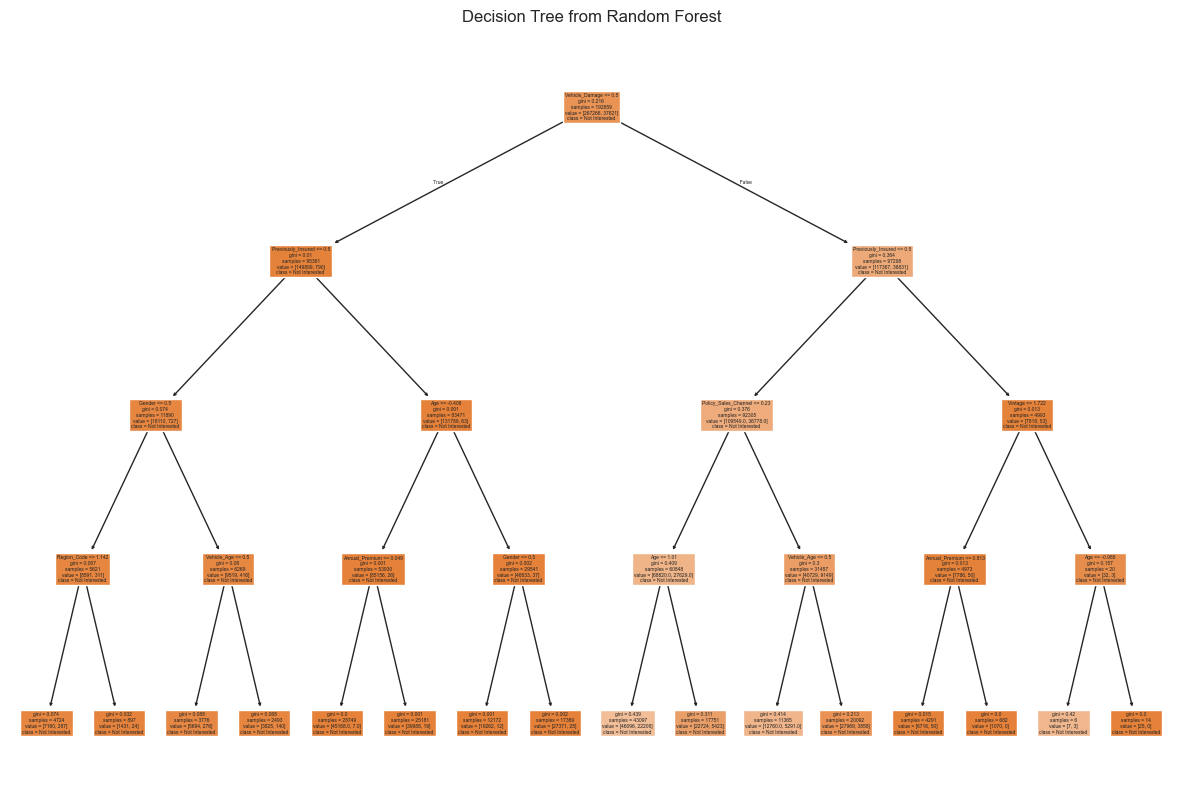

In [307]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# Train Random Forest Model
rf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42)
rf.fit(X_train, y_train)

# Extract one tree from the forest
plt.figure(figsize=(15, 10))
tree.plot_tree(rf.estimators_[0], feature_names=X_train.columns, class_names=["Not Interested", "Interested"], filled=True)
plt.title("Decision Tree from Random Forest")
plt.show()

## Conclusion : Summary And Learnings.
- Successfully built a machine learning model for customer response prediction.
- Random Forest performed best, balancing accuracy and recall.
- The model optimizes marketing efforts, improving conversion rates and sales efficiency.
- Next Steps: Deploy the model into production and refine it with new data.